Let's look at the location of food service joints in Austin and a history of their alcohol servings using geopandas!

Some links:
- For data cleaning 
    - https://socalgis.org/2016/04/05/python-library-for-standardizing-us-addresses/
    - https://github.com/datamade/usaddress
    - https://parserator.datamade.us/usaddress/
    
- For google maps:
    - https://developers.google.com/maps/documentation/geocoding/get-api-key
    - https://developers.google.com/maps/documentation/geocoding/best-practices
- For nominatium


- Simple walk-thru at Country Level 
    - https://www.learnpythonwithrune.org/pandas-and-geopy-plot-world-population-by-latitude-and-longitude-using-weighted-histograms-5-step-tutorial/
    
- Video Tutorials
    -https://youtu.be/q_OUHA_zqeM (44 Python Tutorial Example Geocoding Addresses with Pandas and Geopy)
    

In [1]:
import pandas as pd
import numpy as np

In [36]:
#import the data files
food_joints=pd.read_csv('Food_Establishment_Inspection_Scores.csv', parse_dates=['Inspection Date'])
mixed_beverages=pd.read_csv('Mixed_Beverage_Gross_Receipts.csv')

In [37]:
from geopy.geocoders import get_geocoder_for_service
get_geocoder_for_service("nominatim")

geopy.geocoders.nominatim.Nominatim

In [38]:
food_joints

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,Austin Golf Club,78669.0,2018-08-15,100,"24900 W SH\nSPICEWOOD, TX 78669",2801719,Routine Inspection
1,Habesha Restaurant & Bar,78723.0,2018-02-12,78,"1 2\nAUSTIN, TX 78723",10864575,Routine Inspection
2,LW - Raising Cane's Restaurants,78734.0,2020-09-15,100,"1600 S FM 620 RD\nLAKEWAY, TX 78734",11531765,Routine Inspection
3,Dollar Tree #07241,78736.0,2018-01-25,92,"7101 W SH\nAUSTIN, TX 78736",11723124,Routine Inspection
4,Cedar International Academy II,78753.0,2018-05-09,85,"8416 N IH\nAUSTIN, TX 78753",10118311,Routine Inspection
...,...,...,...,...,...,...,...
25388,Burger Fi,78749.0,2018-06-08,91,"5701 W SLAUGHTER LN\nAUSTIN, TX 78749\n(30.201...",10985744,Routine Inspection
25389,S-H Donuts,78723.0,2020-06-09,88,"5313 MANOR RD\nAUSTIN, TX 78723\n(30.300732, -...",10451981,Routine Inspection
25390,The Rolling Rooster,78727.0,2018-03-20,65,"13717 BURNET RD\nAUSTIN, TX 78727\n(30.438049,...",11692367,Routine Inspection
25391,Best Taste Of Pho Saigon,78756.0,2020-06-16,84,"5222 BURNET RD\nAUSTIN, TX 78756\n(30.324549, ...",12392379,Routine Inspection


In [48]:
food_joints[['Street', 'City', 'geo']]=food_joints['Address'].str.split(pat='\n', expand=True)

In [54]:
#look for missing geos
food_joints['missing_geo']=food_joints['geo'].isnull()

In [55]:
food_joints.groupby(pd.Grouper(key='Inspection Date', freq='M'))['missing_geo'].sum()

Inspection Date
2018-01-31     72
2018-02-28    111
2018-03-31    108
2018-04-30     96
2018-05-31     68
2018-06-30     99
2018-07-31    133
2018-08-31     99
2018-09-30     83
2018-10-31    103
2018-11-30     47
2018-12-31     69
2019-01-31     90
2019-02-28     90
2019-03-31     82
2019-04-30     89
2019-05-31    107
2019-06-30     96
2019-07-31    112
2019-08-31     93
2019-09-30    123
2019-10-31    118
2019-11-30     96
2019-12-31    123
2020-01-31    109
2020-02-29     90
2020-03-31    114
2020-04-30    117
2020-05-31    108
2020-06-30     89
2020-07-31    102
2020-08-31    106
2020-09-30     76
2020-10-31     73
2020-11-30     90
2020-12-31     87
Freq: M, Name: missing_geo, dtype: int64

In [58]:
food_joints.query("`Inspection Date` >= '01-01-2020'")

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Street,City,geo,missing_geo
2,LW - Raising Cane's Restaurants,78734.0,2020-09-15,100,"1600 S FM 620 RD\nLAKEWAY, TX 78734",11531765,Routine Inspection,1600 S FM 620 RD,"LAKEWAY, TX 78734",None,True
12,Hayley Cakes and Cookies,78730.0,2020-03-17,99,"10601 FM 2222 RD\nAUSTIN, TX 78730",11042164,Routine Inspection,10601 FM 2222 RD,"AUSTIN, TX 78730",None,True
15,Courtesy Shell #4,78741.0,2020-12-11,91,"2241 S IH\nAUSTIN, TX 78741",11130514,Routine Inspection,2241 S IH,"AUSTIN, TX 78741",None,True
23,PF - Bush's Chicken,78660.0,2020-10-14,90,"21315 N SH\nPFLUGERVILLE, TX 78660",12392711,Routine Inspection,21315 N SH,"PFLUGERVILLE, TX 78660",None,True
24,Mi Pueblito Market,78741.0,2020-01-30,91,"2030 E OLTORF ST\nAUSTIN, TX 78741\n(30.230384...",10214537,Routine Inspection,2030 E OLTORF ST,"AUSTIN, TX 78741","(30.230384, -97.732366)",False
...,...,...,...,...,...,...,...,...,...,...,...
25369,La Tapatia #7,78757.0,2020-05-06,81,"8618 RESEARCH BLVD\nAUSTIN, TX 78757\n(30.3624...",12185861,Routine Inspection,8618 RESEARCH BLVD,"AUSTIN, TX 78757","(30.362484, -97.717498)",False
25371,Casa Montessori,78703.0,2020-09-10,100,"404 ATLANTA ST\nBLDG B AUSTIN, TX 78703\n(30.2...",12027109,Routine Inspection,404 ATLANTA ST,"BLDG B AUSTIN, TX 78703","(30.276546, -97.77096)",False
25389,S-H Donuts,78723.0,2020-06-09,88,"5313 MANOR RD\nAUSTIN, TX 78723\n(30.300732, -...",10451981,Routine Inspection,5313 MANOR RD,"AUSTIN, TX 78723","(30.300732, -97.685406)",False
25391,Best Taste Of Pho Saigon,78756.0,2020-06-16,84,"5222 BURNET RD\nAUSTIN, TX 78756\n(30.324549, ...",12392379,Routine Inspection,5222 BURNET RD,"AUSTIN, TX 78756","(30.324549, -97.739532)",False


In [167]:
food_joints['geo'].str.contains('[0-9]*', regex=True).value_counts(dropna=False)
food_joints[['lat', 'lon']]=((food_joints['geo'].str.replace('(', '')).str.replace(')', '')).str.split(',', expand=True)

<ipython-input-167-84638b9df1e2>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [168]:
food_joints[['lat', 'lon']]=food_joints[['lat', 'lon']].astype('float')
display(food_joints['Inspection Date'].dt.day.isnull().sum())
food_joints.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25393 entries, 0 to 25392
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant Name      25393 non-null  object        
 1   Zip Code             25385 non-null  float64       
 2   Inspection Date      25393 non-null  datetime64[ns]
 3   Score                25393 non-null  int64         
 4   Address              25391 non-null  object        
 5   Facility ID          25393 non-null  int64         
 6   Process Description  25393 non-null  object        
 7   Street               25391 non-null  object        
 8   City                 25391 non-null  object        
 9   geo                  21925 non-null  object        
 10  missing_geo          25393 non-null  bool          
 11  lat                  21925 non-null  float64       
 12  lon                  21925 non-null  float64       
dtypes: bool(1), datetime64[ns](1), 

In [183]:
import plotly.express as px
import plotly.io as pio
pio.templates.defauly="plotly+draft" # does this even do anything?


df = food_joints.query("`Inspection Date` >= '12-01-2020'")
df['color']=df.Score.round(-1)
df['Score']=df['Score'].astype('string') + "%"

<ipython-input-183-955a3e91f40d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-955a3e91f40d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [514]:

fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        color='color',
                        custom_data=['Restaurant Name','Score','Street', 'Inspection Date'],
                        size_max=10,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")

fig.update_traces(showlegend=False,
    hovertemplate="<br>".join([
        "Restaurant Name: %{customdata[0]}",
        "Score: %{customdata[1]}",
        "Street: %{customdata[2]}",
        "Inspection Date: %{customdata[3]}"
    ]), marker_size = 10, marker_opacity = 0.5)
fig.show()

OK, so that's a terrible color scale. Plus I don't think it's color blind friendly. Take a second to read this article about creating graphics that a visually impaired friendly: https://venngage.com/blog/color-blind-friendly-palette/

Let's change the color scale bar to something else and then reseve it. Since the colors for the scale are passed as a list plotly express we can provide the follow to do make this change.
- color_continuous_scale=px.colors.diverging.RdYlGn[::-1]

In [516]:
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        color='color',
                        custom_data=['Restaurant Name','Score','Street', 'Inspection Date'],
                        color_continuous_scale=px.colors.diverging.RdYlGn[::-1],
                        size_max=10,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")

fig.update_traces(showlegend=False,
    hovertemplate="<br>".join([
        "Restaurant Name: %{customdata[0]}",
        "Score: %{customdata[1]}",
        "Street: %{customdata[2]}",
        "Inspection Date: %{customdata[3]}"
    ]), marker_size = 10, marker_opacity = 0.5)
fig.show()

OK, so that's a little more clear ( though red for 100% isn't a great choice. I really just wanted to show that you can reverse color scales). However, since we can provide reverse this list, it seems logical we could just pass a list to plotly. I'm to start by looking at what the actual command entails.

- color_continuous_scale=px.colors.diverging.RdYlGn[::-1]

Here's a link to stack exchange about this topic: https://stackoverflow.com/questions/57167826/how-to-reverse-the-color-scale-in-a-plotly-express-map#57169970

In [531]:
print("Red-Yellow-Green Scale in Proper Order")
print(px.colors.diverging.RdYlGn[:])
print("\n Red-Yellow-Green Scale in Reverse Order")
print(px.colors.diverging.RdYlGn[::-1])
print("\n How many items are in the list again?")
print(len(px.colors.diverging.RdYlGn[::-1]))

Red-Yellow-Green Scale in Proper Order
['rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)', 'rgb(253,174,97)', 'rgb(254,224,139)', 'rgb(255,255,191)', 'rgb(217,239,139)', 'rgb(166,217,106)', 'rgb(102,189,99)', 'rgb(26,152,80)', 'rgb(0,104,55)']

 Red-Yellow-Green Scale in Reverse Order
['rgb(0,104,55)', 'rgb(26,152,80)', 'rgb(102,189,99)', 'rgb(166,217,106)', 'rgb(217,239,139)', 'rgb(255,255,191)', 'rgb(254,224,139)', 'rgb(253,174,97)', 'rgb(244,109,67)', 'rgb(215,48,39)', 'rgb(165,0,38)']

 How many items are in the list again?
11


Alright, so now I need a list of 11 colors to pass to plotly. Where can I fund such colors? Well I just did an internet search for "Colorblindess friendly color scales."

Lo and behold, the great Edward Tuft (go look him up if you want) has this page put together about it: 
- https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0000HT

But there's another option. See the 'color" column in my data is rounded to the nearest 10th so 99=100, 87=9, 72=70 and so on. Instead of trying to find 10 colors that are friendly, maybe it's possible to find 10 distinct shapes instead or maybe I can display the score value with each point.

In [544]:
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        color='color',
                        text='Score',
                        custom_data=['Restaurant Name','Score','Street', 'Inspection Date'],
                        color_continuous_scale=px.colors.diverging.RdYlGn[::-1],
                        size_max=10,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")

fig.update_traces(showlegend=False,
        texttemplate ="%{Score}",
        textposition='top left',
        textfont=dict(color='#E58606'),
        mode='markers+text',
        hovertemplate="<br>".join([
        "Restaurant Name: %{customdata[0]}",
        "Score: %{customdata[1]}",
        "Street: %{customdata[2]}",
        "Inspection Date: %{customdata[3]}"
    ]), marker_size = 10, marker_opacity = 0.5)
fig.show()

In [233]:
(pd.to_datetime(mixed_beverages['Obligation End Date']).dt.year).value_counts()
#ok so that's a lot. Let's narrow down to just those with end dates in 2021

2020    211465
2019    204953
2018    197200
2017    190642
2016    184896
2015    177855
2014    173829
2013    171601
2012    166888
2011    164311
2010    159625
2009    153749
2008    149087
2007    143090
2021     75284
Name: Obligation End Date, dtype: int64

In [390]:
mixed_beverages['Obligation End Date']=pd.to_datetime(mixed_beverages['Obligation End Date'])

In [448]:
recent_mixed=mixed_beverages.query("`Obligation End Date` >= '01-01-2008'")

In [449]:
recent_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381385 entries, 0 to 2524474
Data columns (total 24 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Taxpayer Number             int64         
 1   Taxpayer Name               object        
 2   Taxpayer Address            object        
 3   Taxpayer City               object        
 4   Taxpayer State              object        
 5   Taxpayer Zip                float64       
 6   Taxpayer County             int64         
 7   Location Number             int64         
 8   Location Name               object        
 9   Location Address            object        
 10  Location City               object        
 11  Location State              object        
 12  Location Zip                int64         
 13  Location County             int64         
 14  Inside/Outside City Limits  object        
 15  TABC Permit Number          object        
 16  Responsibility Beg

Notice that basically ALL the dtypes are wrong. Instead of changing each one, let's do this as one bulk change. I'll skip the ones with receipt in the name to show you a trick on this.

In [450]:
recent_mixed=recent_mixed.astype({'Taxpayer Number': 'object',
                     'Taxpayer Name': 'object',
                    'Taxpayer Zip':'object',
                    'Taxpayer County': 'object',
                    'Responsibility Begin Date': 'datetime64',
                    'Responsibility End Date': 'datetime64'})

So, I know that columns 19 and onward are supposed to be float values that should be changed. Instead of typing out each one, I'll construct a lambda function to replacethe comma value and change all the columns at one time with the index location of the column (.iloc).
- Here's the link to the stack exchange post that I used to help construct my loop: https://stackoverflow.com/questions/48328970/how-to-convert-pandas-columns-to-double-in-for-loop#48329148

In [451]:
recent_mixed.iloc[:, 19:]=recent_mixed.iloc[:,19:].apply(lambda x: x.str.replace(',','')).astype(float)

In [456]:
recent_mixed.iloc[:, 19:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381385 entries, 0 to 2524474
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Liquor Receipts        float64
 1   Wine Receipts          float64
 2   Beer Receipts          float64
 3   Cover Charge Receipts  float64
 4   Total Receipts         float64
 5   zip                    string 
dtypes: float64(5), string(1)
memory usage: 127.2 MB


Yay! That was simple.

In [580]:
import geopandas
zipfile = "tl_2020_us_zcta510.zip"
ztca = geopandas.read_file(zipfile)

In [582]:
ztca['zip']=ztca['ZCTA5CE10'].astype('string')
recent_mixed['zip']=recent_mixed['Location Zip'].astype('string')
# get the totals zip code

zip_totals=recent_mixed.groupby('zip')[['Liquor Receipts','Wine Receipts','Beer Receipts','Cover Charge Receipts','Total Receipts']].sum()
zip_totals

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
zip,,,,,
75001,190952739.0,61672017.0,108972540.0,2950622.0,364993696.0
75002,67029672.0,14226369.0,57508237.0,97897.0,138862175.0
75006,24385550.0,4046262.0,14105494.0,35853.0,42653223.0
75007,31008741.0,3635860.0,16735903.0,21090.0,51406070.0
75009,2419431.0,233155.0,1065772.0,0.0,3723548.0
...,...,...,...,...,...
79934,2870554.0,304288.0,5234533.0,0.0,8409375.0
79935,23100652.0,862804.0,28240938.0,66129.0,52339795.0
79936,201913902.0,12535509.0,194538851.0,454845.0,409976786.0


In [583]:
zip_pay=zip_totals.join(ztca.set_index('zip'), how = 'left')
zip_pay

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
zip,,,,,,,,,,,,,,,
75001,190952739.0,61672017.0,108972540.0,2950622.0,364993696.0,75001,75001,B5,G6350,S,9915172.0,8702.0,+32.9600470,-096.8385216,"POLYGON ((-96.85891 32.95326, -96.85888 32.954..."
75002,67029672.0,14226369.0,57508237.0,97897.0,138862175.0,75002,75002,B5,G6350,S,96347638.0,5289260.0,+33.0898539,-096.6086003,"POLYGON ((-96.68551 33.07379, -96.68455 33.075..."
75006,24385550.0,4046262.0,14105494.0,35853.0,42653223.0,75006,75006,B5,G6350,S,43513857.0,846029.0,+32.9621408,-096.8985846,"POLYGON ((-96.94440 32.96630, -96.94437 32.966..."
75007,31008741.0,3635860.0,16735903.0,21090.0,51406070.0,75007,75007,B5,G6350,S,30430355.0,314310.0,+33.0052617,-096.8967417,"POLYGON ((-96.94846 32.99399, -96.94845 32.994..."
75009,2419431.0,233155.0,1065772.0,0.0,3723548.0,75009,75009,B5,G6350,S,247632938.0,3711938.0,+33.3388989,-096.7529773,"POLYGON ((-96.89262 33.28215, -96.89253 33.283..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79934,2870554.0,304288.0,5234533.0,0.0,8409375.0,79934,79934,B5,G6350,S,153423879.0,178564.0,+31.9506694,-106.4335175,"POLYGON ((-106.51706 32.00076, -106.51399 32.0..."
79935,23100652.0,862804.0,28240938.0,66129.0,52339795.0,79935,79935,B5,G6350,S,9079681.0,0.0,+31.7679446,-106.3301772,"POLYGON ((-106.34525 31.75268, -106.34509 31.7..."
79936,201913902.0,12535509.0,194538851.0,454845.0,409976786.0,79936,79936,B5,G6350,S,68971190.0,54180.0,+31.7765930,-106.2969765,"POLYGON ((-106.36225 31.83114, -106.36189 31.8..."


In [585]:
from geopandas import GeoDataFrame
merged = GeoDataFrame(zip_pay)
display(merged['Total Receipts'])
type(merged)
display(merged['Total Receipts'].sort_values(ascending=False))


zip
75001    364993696.0
75002    138862175.0
75006     42653223.0
75007     51406070.0
75009      3723548.0
            ...     
79934      8409375.0
79935     52339795.0
79936    409976786.0
79938     42669897.0
79968      2286344.0
Name: Total Receipts, Length: 1317, dtype: float64

zip
78701    2.915591e+09
78205    1.430869e+09
75201    1.335637e+09
77002    1.244020e+09
77006    1.025279e+09
             ...     
75960    0.000000e+00
75962    0.000000e+00
77837    0.000000e+00
78675    0.000000e+00
77050    0.000000e+00
Name: Total Receipts, Length: 1317, dtype: float64

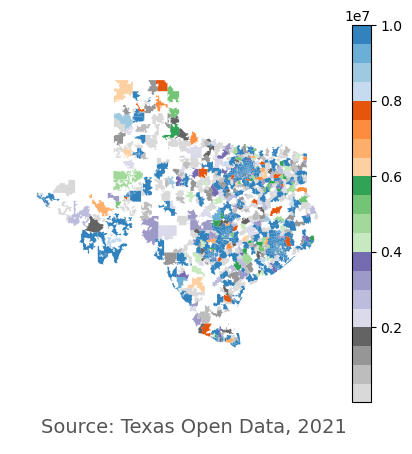

In [589]:
# set up : see here for more info -> https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
    # Because we have made a specific statement to the axes and figure, we need to change the figure size here as opposed to in the .plot statement...
    #...any changes to the size in the .plot statement will be ignored.
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=100)

import matplotlib
from matplotlib import colors as colors

ax.axis('off')

#Create the plot here
merged['data']= merged['Total Receipts']
fig=merged.plot(column=('data'),
                cmap='tab20c_r',
                ax=ax,
                legend=True,
                norm=matplotlib.colors.Normalize(vmin=10000,
                                                 vmax=10000000, clip=True))

#add an annotation for the source code at the bottom, check your size to ensure the annotate is legible.
ax.annotate('Source: Texas Open Data, 2021',
            xy=(0.1, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=14,
            color='#555555')
plt.show()